<a href="https://colab.research.google.com/github/SLuis25/Simulaci-n-I/blob/main/Trasformada_Inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [37]:
def TInversa(a, b, c, n):
    p = (b - a) / (c - a)  # Calcula la probabilidad de estar en la rama creciente
    U = np.random.rand(n)
    X = np.empty(n)

    r = U < p    # Rama creciente
    X[r] = a + np.sqrt(U[r] * (b - a) * (c - a))  # Usamos la inversa de la Acumulada: x = a + sqrt(U * (b - a) * (c - a))

    # Rama decreciente: para U >= p
    U2 = U[~r]  # Uniformes correspondientes a la rama decreciente
    X[~r] = c - np.sqrt((1 - U2) * (c - a) * (c - b)) #   Usamos la inversa de la Acumulada: x = c - sqrt((1 - U) * (c - a) * (c - b))

    return X

In [44]:
def densidad_triangular(x, a, b, c):
    pdf = np.zeros_like(x)
    r2 = (x >= a) & (x < b)  # Parte creciente: a ≤ x < b
    #    f(x) = 2(x - a)/[(c - a)(b - a)]
    pdf[r2] = 2 * (x[r2] - a) / ((c - a) * (b - a))


    r2 = (x >= b) & (x <= c)     # Parte decreciente: b ≤ x ≤ c
    #    f(x) = 2(c - x)/[(c - a)(c - b)]
    pdf[r2] = 2 * (c - x[r2]) / ((c - a) * (c - b))

    return pdf

In [45]:
a, b, c = 1, 3, 5    # Parámetros
N = 100000
muestras = TInversa(a, b, c, N)

In [46]:
# Estadísticas empíricas
media_emp = np.mean(muestras)
std_emp = np.std(muestras, ddof=1)

In [47]:
# Estadísticos teóricos
media_teo = (a + b + c) / 3
var_teo = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
std_teo = np.sqrt(var_teo)

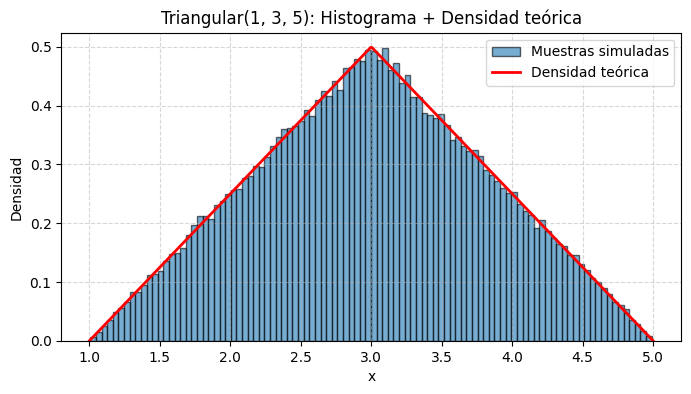

In [48]:
# Histograma de densidad + densidad teórica
plt.figure(figsize=(8, 4))

# Histograma normalizado para densidad
plt.hist(
muestras, bins=100, density=True,
edgecolor='black', alpha=0.6,
label="Muestras simuladas")

# Puntos donde evaluaremos la densidad teórica
x_plot = np.linspace(a, c, 500)

# Curva de la densidad teórica
plt.plot(
    x_plot,
    densidad_triangular(x_plot, a, b, c),
    color='red', linewidth=2,
    label="Densidad teórica")
plt.title(f"Triangular({a}, {b}, {c}): Histograma + Densidad teórica")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.grid(linestyle="--", alpha=0.5)
plt.show()

In [49]:
print(f"Media empírica:             {media_emp:.4f}")
print(f"Desviación estándar empírica: {std_emp:.4f}")
print(f"Media teórica:              {media_teo:.4f}")
print(f"Desviación estándar teórica:  {std_teo:.4f}")

Media empírica:             2.9994
Desviación estándar empírica: 0.8175
Media teórica:              3.0000
Desviación estándar teórica:  0.8165
